In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import neattext.functions as nfx
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import nltk.corpus
%matplotlib inline

In [2]:
df=pd.read_csv('emotion_dataset_2.csv')

In [3]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [4]:
df=df.drop(['Unnamed: 0','Clean_Text'],axis=1)

In [5]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


<Axes: >

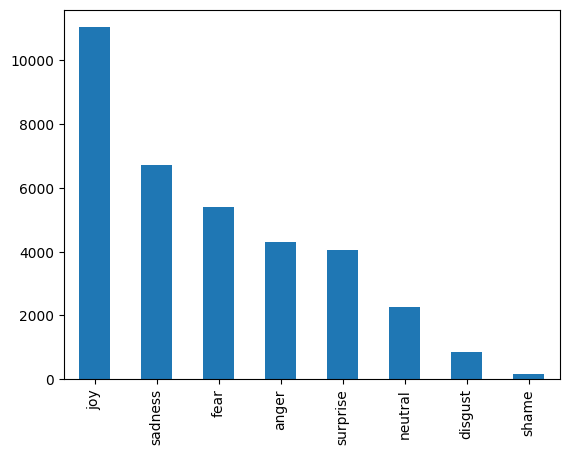

In [6]:
df['Emotion'].value_counts().plot(kind='bar')

In [7]:
df.shape

(34792, 2)

In [8]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [9]:
from textblob import TextBlob

In [10]:
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment>0:
        res='Positive'
    elif sentiment<0:
        res='Negative'
    else:
        res='Neutral'
    return res

In [11]:
get_sentiment('I love coding')

'Positive'

In [12]:
df['Sentiment']=df['Text'].apply(get_sentiment)

In [13]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [14]:
df['Sentiment'].value_counts()

Positive    13616
Neutral     12371
Negative     8805
Name: Sentiment, dtype: int64

In [15]:
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def clean_text(text):
        text=text.lower()
        text = re.sub(r'\d+', '', text)
        translator = str.maketrans('', '', st.punctuation)
        text=text.translate(translator)
        text=" ".join(text.split())
        data=text
        stop_words = set(stopwords.words("english"))
        word_tokens = word_tokenize(text)
        text = [word for word in word_tokens if word not in stop_words]
        text=" ".join(text)
        if len(text)==0:
            text=data
        return text

In [33]:
df['Clean_Text']=df['Text'].apply(clean_text)

In [34]:
df.head()

,Emotion,Text,Sentiment,Clean_Text
0,neutral,Why ?,Neutral,why
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,sage act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,way homegirl baby funeral man hate funerals re...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant regular featur...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,iluvmiasantos ugh babe hugggzzz u babe naamaze...


In [94]:
mod_df=df[['Text','Clean_Text','Emotion']]
mod_df.to_csv('mod_df.csv')

In [35]:
from collections import Counter

In [96]:
dl=pd.read_csv('mod_df.csv')
dl.isnull().sum()

Unnamed: 0     0
Text           0
Clean_Text    17
Emotion        0
dtype: int64

In [36]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [37]:
emotion_list=df['Emotion'].unique().tolist()

In [38]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [39]:
joy_list=df[df['Emotion']=='joy']['Clean_Text'].tolist()

In [40]:
joy_docx=' '.join(joy_list)

In [41]:
#Extract_keywords(joy_docx)
keyword_joy=extract_keywords(joy_docx)

In [42]:
keyword_joy

{'day': 791,
 'time': 705,
 'im': 694,
 'amp': 681,
 'christmas': 622,
 'love': 591,
 'work': 556,
 'today': 523,
 'get': 514,
 'like': 497,
 'tomorrow': 492,
 'happy': 486,
 'got': 460,
 'good': 431,
 'one': 406,
 'back': 405,
 'joy': 397,
 'go': 374,
 'going': 366,
 'night': 349,
 'school': 341,
 'morning': 325,
 'home': 322,
 'life': 304,
 'first': 298,
 'see': 278,
 'feel': 269,
 'dont': 267,
 'great': 256,
 'hours': 254,
 'week': 238,
 'family': 237,
 'year': 234,
 'cant': 231,
 'last': 230,
 'much': 229,
 'god': 224,
 'tonight': 221,
 'days': 219,
 'long': 218,
 'people': 217,
 'new': 216,
 'well': 211,
 'oh': 209,
 'sleep': 192,
 'na': 191,
 'next': 189,
 'know': 188,
 'hour': 184,
 'feeling': 180}

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,confusion_matrix

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
X=df['Clean_Text']
y=df['Emotion']

In [50]:
cv=CountVectorizer()
X=cv.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [52]:
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [53]:
nv_model.score(X_test,y_test)

0.5764675143703187

In [54]:
y_pred=nv_model.predict(X_test)

In [109]:
sample_text='he hates running all day'
sample_text=clean_text(sample_text)
sample_text=[sample_text]
sample_text

['hates running day']

In [ ]:
vect=cv.transform(sample_text).toarray()
emotion=nv_model.predict(vect)
emotion[0]

In [104]:
emotion[0]
preb_proba=nv_model.predict_proba(vect)

In [105]:
pred_for_all=dict(zip(nv_model.classes_,preb_proba[0]))

In [106]:
data = pd.DataFrame(pred_for_all,index=[0])

In [107]:
data.plot

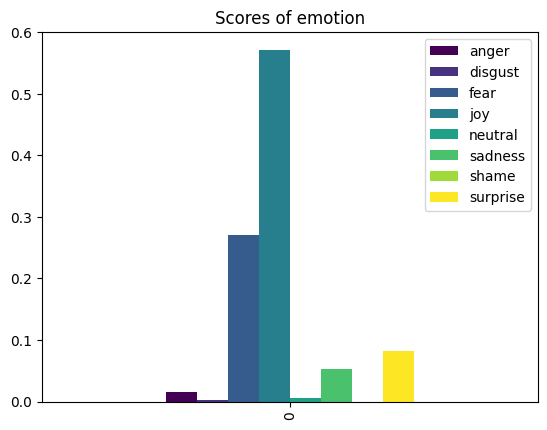

In [85]:
data.plot(kind='bar', title = 'Scores of emotion', colormap = 'viridis');

In [87]:
import pickle
pickle_out = open("Emotion_Detector.pkl", "wb")
pickle.dump(nv_model, pickle_out)
pickle_out.close()